# 附錄一

## 4.1~4.3 模擬生成資料

#### 比較少數(100筆)的不平衡資料
#### 比例各為1:1、10:1、100:1
#### 資料集(多數 (y=0) :少數 (y=1))為 
#### 100:100,   1000:100,   10000:100

## PACKAGE

In [1]:
cd ..

C:\Users\innocence846\Desktop\論文\bayesian_tree-master\do


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, \
    recall_score, f1_score
from imblearn.over_sampling import SMOTE
import time
import matplotlib.pyplot as plt

In [3]:
from bayesian_decision_tree.classification import PerpendicularClassificationTree
from examples import helper

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.model_selection import RandomizedSearchCV
import random
from sklearn import metrics
from sklearn.metrics import classification_report

### 100:100

### DATA

In [5]:
np.random.seed(1)

m = 100

data100_1 = {
    "x1": np.random.normal(0, 1, m),
    "x2": np.random.normal(0, 1, m),
    "x3": np.random.normal(0, 1, m),
    "x4": np.random.normal(0, 1, m),
    "x5": np.random.normal(0, 1, m),
    "x6": np.random.normal(0, 1, m),
    "x7": np.random.normal(0, 1, m),
    "x8": np.random.normal(0, 1, m),
    "x9": np.random.normal(0, 1, m),
    "x10": np.random.normal(0, 1, m),
    "y": [1]*m
}

data100_1 = pd.DataFrame(data100_1)

data100_0 = {
    "x1": np.random.normal(1, 1, m),
    "x2": np.random.normal(2, 1, m),
    "x3": np.random.normal(3, 1, m),
    "x4": np.random.normal(0, 1, m),
    "x5": np.random.normal(0, 1, m),
    "x6": np.random.normal(0, 1, m),
    "x7": np.random.normal(0, 1, m),
    "x8": np.random.normal(0, 1, m),
    "x9": np.random.normal(0, 1, m),
    "x10": np.random.normal(0, 1, m),
    "y": [0]*m
}

data100_0 = pd.DataFrame(data100_0)

In [6]:
x100 = np.append(np.array(data100_0)[:, 0:10],np.array(data100_1)[:, 0:10], axis = 0)
y100 = np.append(np.array(data100_0)[:, 10],np.array(data100_1)[:, 10])

In [7]:
x100_train, x100_test, y100_train, y100_test = train_test_split(x100, y100, test_size=0.2,  random_state=1) 

In [8]:
data100_0

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.846764,1.866511,2.460967,1.081093,0.189199,1.301225,0.291005,-1.289130,-1.307971,0.933630,0
1,-1.432509,3.986565,3.644100,1.724392,1.223936,-0.312392,1.074900,0.109783,1.472396,-1.763775,0
2,1.507984,0.720574,3.183634,-0.402468,-0.300931,-0.271229,-0.697810,-0.010526,0.074876,-0.410217,0
3,0.675968,0.659791,2.913573,-1.476899,0.251310,1.862913,-0.578326,-0.388241,-1.786935,-0.453667,0
4,-0.511077,2.354602,2.786012,0.638929,0.928290,-0.642874,-0.847453,0.489219,0.165211,-0.589430,0
...,...,...,...,...,...,...,...,...,...,...,...
95,0.644758,1.843157,2.641411,-1.098149,0.196645,-1.811754,0.296957,0.833679,0.213026,0.188583,0
96,1.096114,1.353509,3.603036,1.308932,-0.632590,-1.137304,-1.400594,2.160456,-0.804542,0.560918,0
97,1.152052,0.551008,3.314432,0.733073,-0.209847,-0.803073,1.549609,1.998992,-0.646582,-0.921659,0
98,2.155262,2.779492,3.333115,0.652180,1.897161,1.314941,-1.070017,0.764041,1.138173,0.647375,0


In [9]:
data100_1

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.624345,-0.447129,-0.400878,2.065783,-1.306534,-1.719394,-1.072964,-0.790800,0.814343,-0.446699,1
1,-0.611756,1.224508,0.824006,-1.471157,0.076380,0.057121,0.495159,1.223722,0.780470,0.204377,1
2,-0.528172,0.403492,-0.562305,-0.830172,0.367232,-0.799547,-0.952062,-0.059368,-1.464054,0.612233,1
3,-1.072969,0.593579,1.954878,-0.880578,1.232899,-0.291595,-0.518146,1.448989,-0.154491,0.744885,1
4,0.865408,-1.094912,-1.331952,-0.279098,-0.422857,-0.258983,-1.461404,-0.477581,-0.092432,-0.036281,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0.077340,-1.627438,-0.297362,0.794528,-0.828628,1.453918,-0.131676,-1.229574,0.578464,-0.116444,1
96,-0.343854,0.602319,0.417302,-1.873161,0.528880,0.661681,1.018552,1.108617,-0.961264,-2.277298,1
97,0.043597,0.420282,0.784771,0.920615,-2.237087,0.986352,1.230558,-0.702920,-1.458324,-0.069625,1
98,-0.620001,0.810952,-0.955425,-0.035368,-1.107713,-0.466155,-1.181103,0.725551,0.494342,0.353870,1


### GMT

Parameters
    
    partition_prior : float, must be > 0.0 and < 1.0, typical value: 0.9
        將節點的數據分成兩個孩子的先驗概率。
        較小的值往往會降低樹的深度，從而降低表達能力，但也會減少過度擬合。
        較大的值往往會增加樹的深度，從而導致樹更好地擬合數據，這可能導致過度擬合。

    prior : array_like, shape = [number of classes]
        Dirichlet 共軛先驗的超參數 [alpha_0, alpha_1, ..., alpha_{N-1}]，參見 [1] 和 [2]。 
        所有 alpha_i 必須為正數，alpha_i 表示第 i 類的先前偽觀察數。
        alpha_i 的小值表示弱先驗，導致訓練數據主導後驗。 這可能導致過度擬合。
        alpha_i 的較大值表示強先驗，因此對數據的權重較小。 這可以用於正則化。

    delta : float, default=0.0
        隨著樹的深入，確定先驗的加強。 必須是介於 0.0 和 1.0 之間的值。

    prune : boolean, default=False
        通過刪除所有不添加信息的拆分（即兩個孩子的預測相同的情況），在擬合後修剪樹。 
        如果您只對類別預測感興趣 (`predict(X)`)，在分類案例中將其設置為 `True` 通常是明智的，
        但如果您正在尋找類別，則將其設置為 `False` 是有意義的概率（`predict_proba(X)`）。
        在回歸的情況下，它可以安全地設置為“真”，因為它只會在他們的預測相同的情況下合併孩子。

    split_precision : float, default=0.0
        確定考慮拆分的兩個連續點之間的最小距離。 如果距離低於此閾值，則認為這些點沿此方向重疊。
   

#### 挑參數

In [10]:
n_classes = len(np.unique(y100))
    
# prior
prior_pseudo_observations = 1
prior = prior_pseudo_observations * np.ones(n_classes) / (n_classes^5) 

# model
gmt = PerpendicularClassificationTree(
    #partition_prior=0.9,
    prior=prior,
    #delta=0, 
    prune=False) #分類

In [11]:
param_distribs = {
    'partition_prior': np.linspace(0.01,0.99,40),
    'delta': np.linspace(0,1,40)
}

gmt_search = RandomizedSearchCV(gmt, 
    param_distributions=param_distribs, n_iter=100, cv=5, 
    scoring='f1', random_state=1)

gmt_search.fit(x100_train, y100_train)
g1_model = gmt_search.best_estimator_
gmt_search.best_params_

{'partition_prior': 0.8894871794871795, 'delta': 0.02564102564102564}

### 訓練

#### 使用K-FOLD進行訓練，CV設置為5。

In [12]:
f1_train = cross_val_score(g1_model, x100_train, y100_train, scoring='f1', cv=5)
f1_test  = cross_val_score(g1_model, x100_test, y100_test, scoring='f1', cv=5)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.9414 %
Test F1 Score:  1.0000 %


Tree depth and number of leaves: 3, 4


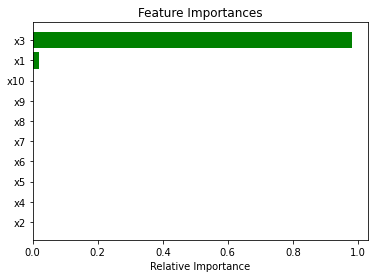

In [13]:
print('Tree depth and number of leaves: {}, {}'.format(g1_model.get_depth(), g1_model.get_n_leaves()))

imp = g1_model.feature_importance()
features = list(data100_1)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### 重複訓練100次，進行平均計算分數

In [15]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x100_train2, x100_test2, y100_train2, y100_test2 = train_test_split(x100, y100, test_size=0.2) 
    g1_model.fit(x100_train2, y100_train2)
    y100_pred_train = g1_model.predict(x100_train2)
    y100_pred_test = g1_model.predict(x100_test2)
    
    tp1, fn1, fp1, tn1 = confusion_matrix(y100_train2, y100_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y100_test2, y100_pred_test).ravel()
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = g1_model.feature_importance()
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(78.52, 2.98, 1.59, 76.91)
Test matrix: 
(18.95, 1.27, 0.94, 18.84)

       Score    y=0(多)    y=1(少)
0  precision  0.937191  0.952477
1     recall  0.952740  0.936847
2   f1-score  0.944902  0.944598
Wall time: 470 ms


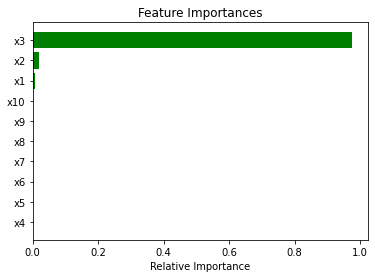

In [18]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### 單次參考訓練數值

In [19]:
%time g1_model.fit(x100_train, y100_train)
y100_pred_train = g1_model.predict(x100_train)
y100_pred_test = g1_model.predict(x100_test)

print('Train matrix: \n{}'.format(confusion_matrix(y100_train, y100_pred_train)))
print('Test matrix: \n{}'.format(confusion_matrix(y100_test, y100_pred_test)))
confusion_matrix(y100_train, y100_pred_train).ravel()

Wall time: 5 ms
Train matrix: 
[[74  3]
 [ 1 82]]
Test matrix: 
[[23  0]
 [ 0 17]]


array([74,  3,  1, 82], dtype=int64)

In [20]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y100_test, y100_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       1.00      1.00      1.00        23
      y=1(少)       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## DT

### 挑選參數

In [21]:
param_distribs = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(low=2, high=15)
}

dt_cf = DecisionTreeClassifier(random_state=1)
dt_search = RandomizedSearchCV(dt_cf, param_distributions=param_distribs, 
                                n_iter=100, cv=5, scoring='f1', random_state=1)
dt_search.fit(x100_train, y100_train)

d1_model = dt_search.best_estimator_
dt_search.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [16]:
# dt100 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=1)

### 訓練

In [22]:
f1_train = cross_val_score(d1_model, x100_train, y100_train, scoring='f1', cv=5)
f1_test  = cross_val_score(d1_model, x100_test, y100_test, scoring='f1', cv=5)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.9427 %
Test F1 Score:  1.0000 %


Tree depth and number of leaves: 3, 5


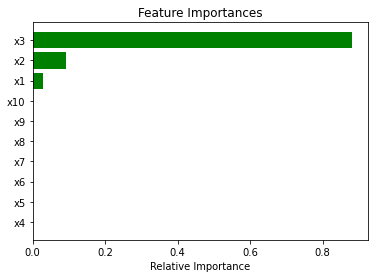

In [23]:
print('Tree depth and number of leaves: {}, {}'.format(d1_model.get_depth(), d1_model.get_n_leaves()))

imp = d1_model.feature_importances_
features = list(data100_0)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 重複訓練100次，進行平均

In [25]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x100_train2, x100_test2, y100_train2, y100_test2 = train_test_split(x100, y100, test_size=0.2) 
    d1_model.fit(x100_train2, y100_train2)
    y100_pred_train = d1_model.predict(x100_train2)
    y100_pred_test = d1_model.predict(x100_test2)
    
    tp1, fn1, fp1, tn1 = confusion_matrix(y100_train2, y100_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y100_test2, y100_pred_test).ravel()
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = d1_model.feature_importances_
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(79.15, 1.15, 0.62, 79.08)
Test matrix: 
(19.19, 1.17, 1.04, 18.6)

       Score    y=0(多)    y=1(少)
0  precision  0.942534  0.947047
1     recall  0.948591  0.940819
2   f1-score  0.945553  0.943923
Wall time: 155 ms


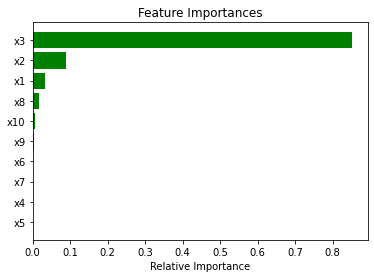

In [26]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### 單次訓練參考

In [27]:
%time d1_model.fit(x100_train, y100_train)
y100_pred_train = d1_model.predict(x100_train)
y100_pred_test = d1_model.predict(x100_test)

print('Train matrix: \n{}'.format(confusion_matrix(y100_train, y100_pred_train)))
print('Test matrix: \n{}'.format(confusion_matrix(y100_test, y100_pred_test)))

Wall time: 1 ms
Train matrix: 
[[77  0]
 [ 3 80]]
Test matrix: 
[[23  0]
 [ 2 15]]


In [28]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y100_test, y100_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       0.92      1.00      0.96        23
      y=1(少)       1.00      0.88      0.94        17

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



## RF

### 挑選參數

In [29]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'criterion': ['gini', 'entropy']
}

rnd_cf = RandomForestClassifier(random_state=1)
rnd_search = RandomizedSearchCV(rnd_cf, param_distributions=param_distribs, 
                                n_iter=100, cv=5, scoring='f1', random_state=1)
rnd_search.fit(x100_train, y100_train)

rf1_model = rnd_search.best_estimator_
rnd_search.best_params_

{'criterion': 'entropy', 'n_estimators': 97}

In [97]:
# rf100 = RandomForestClassifier(random_state=1, criterion = 'entropy', n_estimators = 100)

### 訓練

In [30]:
f1_train = cross_val_score(rf1_model, x100_train, y100_train, scoring='f1', cv=5)
f1_test  = cross_val_score(rf1_model, x100_test, y100_test, scoring='f1', cv=5)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.9758 %
Test F1 Score:  1.0000 %


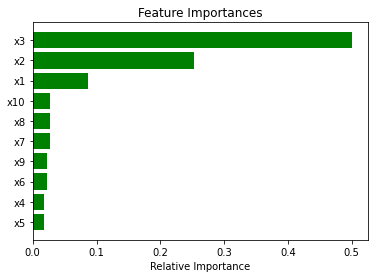

In [31]:
imp = rf1_model.feature_importances_
features = list(data100_0)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 重複訓練100次，進行平均

In [32]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x100_train2, x100_test2, y100_train2, y100_test2 = train_test_split(x100, y100, test_size=0.2) 
    rf1_model.fit(x100_train2, y100_train2)
    y100_pred_train = rf1_model.predict(x100_train2)
    y100_pred_test = rf1_model.predict(x100_test2)
    
    tp1, fn1, fp1, tn1 = confusion_matrix(y100_train2, y100_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y100_test2, y100_pred_test).ravel()
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = rf1_model.feature_importances_
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(80.13, 0.0, 0.0, 79.87)
Test matrix: 
(19.26, 0.69, 0.61, 19.44)

       Score    y=0(多)    y=1(少)
0  precision  0.965414  0.969576
1     recall  0.969300  0.965723
2   f1-score  0.967353  0.967646
Wall time: 9.61 s


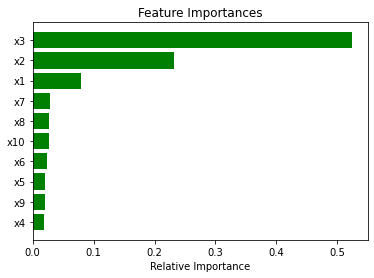

In [33]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()


### 單次訓練參考

In [34]:
%time rf1_model.fit(x100_train, y100_train)
y100_pred_train = rf1_model.predict(x100_train)
y100_pred_test = rf1_model.predict(x100_test)

print('Train matrix: \n{}'.format(confusion_matrix(y100_train, y100_pred_train)))
print('Test matrix: \n{}'.format(confusion_matrix(y100_test, y100_pred_test)))

Wall time: 82 ms
Train matrix: 
[[77  0]
 [ 0 83]]
Test matrix: 
[[23  0]
 [ 0 17]]


In [35]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y100_test, y100_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       1.00      1.00      1.00        23
      y=1(少)       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## 評估指標

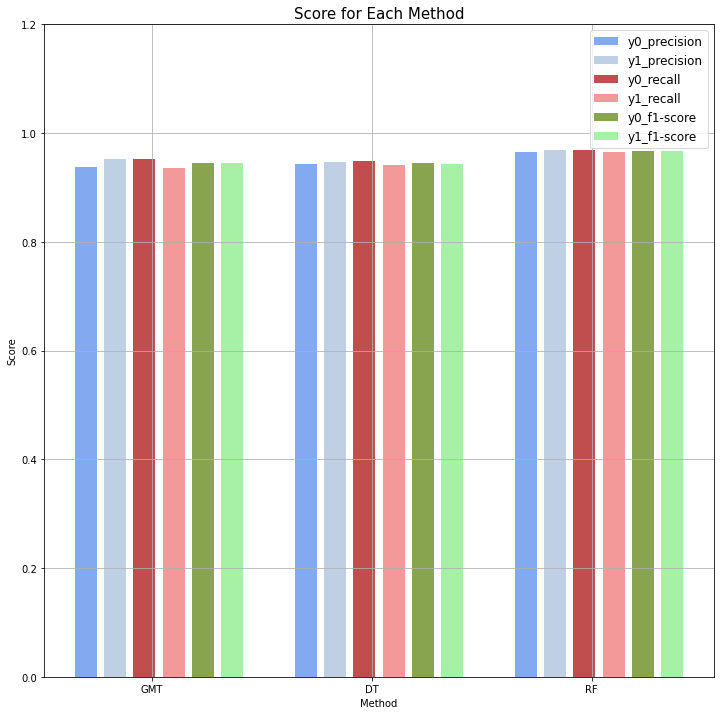

In [137]:
method_count = 3 #列出三個方法的SMOTE前與後
bar_width = 0.3 #長條寬度
index = 3*np.arange(method_count)

#擷取三個評估值的數字
y_0_precision = [0.937191, 0.942534, 0.965414]
y_1_precision = [0.952477, 0.947047, 0.969576]
y_0_recall    = [0.952740, 0.948591, 0.969300]
y_1_recall    = [0.936847, 0.940819, 0.965723]
y_0_f1score   = [0.944902, 0.945553, 0.967353]
y_1_f1score   = [0.944598, 0.943923, 0.967646]

plt.figure(figsize=(12,12))

y_0_precision = plt.bar(index,         #長條圖位置
                       y_0_precision,  #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'cornflowerblue',    
                       label = "y0_precision")
y_1_precision = plt.bar(index+0.4,     #長條圖位置
                       y_1_precision,  #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'lightsteelblue',   
                       label = "y1_precision")
y_0_recall    = plt.bar(index+0.8,     #長條圖位置
                       y_0_recall,     #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'firebrick',   
                       label = "y0_recall")
y_1_recall    = plt.bar(index+1.2,     #長條圖位置
                       y_1_recall,     #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'lightcoral',   
                       label = "y1_recall")
y_0_f1score   = plt.bar(index+1.6,     #長條圖位置
                       y_0_f1score,    #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'olivedrab',   
                       label = "y0_f1-score")
y_1_f1score   = plt.bar(index+2,     #長條圖位置
                       y_1_f1score,    #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'lightgreen',   
                       label = "y1_f1-score")

# 長條圖左上的標籤
def createLabels(data):                   # 自定義函數，為引用plusone團隊
    for item in data:
        height = item.get_height()
        #plt.text(                        # 數值顯示
        #    item.get_x()+item.get_width()/2., 
        #    height*1.05, 
        #    '%d' % int(height),
        #    ha = "center",
        #    va = "bottom",
        #)
createLabels(y_0_precision)
createLabels(y_1_precision)
createLabels(y_0_recall)
createLabels(y_1_recall)
createLabels(y_0_f1score)
createLabels(y_1_f1score)

plt.ylabel("Score")          # 設定y軸標題 
plt.xlabel("Method")            # 設定x軸標題
plt.title("Score for Each Method", {'fontsize' : 15})  # 設定標題、文字大小
plt.xticks(index+3*bar_width ,("GMT", "DT", "RF"))  #.xticks為x軸文字(為了置中所以+0.3/2)
plt.ylim(0, 1.2)                 # 設定y軸範圍
plt.legend(prop = {'size':12})    # 設定圖例及其大小
plt.grid(True)                   # 顯示格線

# 100:1000

## DATA

In [36]:
np.random.seed(1)

m = 100

data1000_1 = {
    "x1": np.random.normal(0, 1, m),
    "x2": np.random.normal(0, 1, m),
    "x3": np.random.normal(0, 1, m),
    "x4": np.random.normal(0, 1, m),
    "x5": np.random.normal(0, 1, m),
    "x6": np.random.normal(0, 1, m),
    "x7": np.random.normal(0, 1, m),
    "x8": np.random.normal(0, 1, m),
    "x9": np.random.normal(0, 1, m),
    "x10": np.random.normal(0, 1, m),
    "y": [1]*m
}

data1000_1 = pd.DataFrame(data1000_1)

data1000_0 = {
    "x1": np.random.normal(1, 1, m*10),
    "x2": np.random.normal(2, 1, m*10),
    "x3": np.random.normal(3, 1, m*10),
    "x4": np.random.normal(0, 1, m*10),
    "x5": np.random.normal(0, 1, m*10),
    "x6": np.random.normal(0, 1, m*10),
    "x7": np.random.normal(0, 1, m*10),
    "x8": np.random.normal(0, 1, m*10),
    "x9": np.random.normal(0, 1, m*10),
    "x10": np.random.normal(0, 1, m*10),
    "y": [0]*m*10
}

data1000_0 = pd.DataFrame(data1000_0)

In [37]:
x1000 = np.append(np.array(data1000_0)[:, 0:10],np.array(data1000_1)[:, 0:10], axis = 0)
y1000 = np.append(np.array(data1000_0)[:, 10],np.array(data1000_1)[:, 10])

sm = SMOTE(random_state=1)
x1000_sm, y1000_sm = sm.fit_resample(x1000, y1000)  

x1000_train, x1000_test, y1000_train, y1000_test = train_test_split(x1000_sm, y1000_sm, test_size=0.2,  random_state=1) 
x1000o_train, x1000o_test, y1000o_train, y1000o_test = train_test_split(x1000, y1000, test_size=0.2,  random_state=1) 

In [38]:
data1000_0

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.846764,2.489517,2.922893,-0.140371,-0.924755,-2.851070,0.920079,-2.219256,0.634025,-0.122474,0
1,-1.432509,2.238796,3.207825,0.141642,1.128890,0.823123,0.018099,-1.233987,0.713001,0.228170,0
2,1.507984,1.551888,3.986196,0.311969,-1.128791,-0.274744,1.475869,1.828446,-0.483319,-0.352305,0
3,0.675968,1.389205,4.432756,0.769085,-0.724738,-0.688101,0.373199,-1.334426,-1.922151,-0.830553,0
4,-0.511077,-0.029945,3.528258,0.584286,0.623571,1.120081,1.295183,0.607579,-0.761337,-0.261090,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1.188583,1.228110,2.874097,1.604546,0.224605,-0.751102,-0.381307,1.304379,0.072959,-0.555574,0
996,1.560918,1.377343,2.039654,0.566613,-0.477144,-1.499377,1.036886,-0.512391,0.489102,1.101262,0
997,0.078341,1.849340,2.156087,-0.775988,-0.691212,-1.000089,0.671736,0.991158,-1.014144,-1.354035,0
998,1.647375,0.599977,3.628342,1.084889,-0.788731,0.261689,0.510561,-0.372678,-0.062696,0.698086,0


In [39]:
data1000_1

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.624345,-0.447129,-0.400878,2.065783,-1.306534,-1.719394,-1.072964,-0.790800,0.814343,-0.446699,1
1,-0.611756,1.224508,0.824006,-1.471157,0.076380,0.057121,0.495159,1.223722,0.780470,0.204377,1
2,-0.528172,0.403492,-0.562305,-0.830172,0.367232,-0.799547,-0.952062,-0.059368,-1.464054,0.612233,1
3,-1.072969,0.593579,1.954878,-0.880578,1.232899,-0.291595,-0.518146,1.448989,-0.154491,0.744885,1
4,0.865408,-1.094912,-1.331952,-0.279098,-0.422857,-0.258983,-1.461404,-0.477581,-0.092432,-0.036281,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0.077340,-1.627438,-0.297362,0.794528,-0.828628,1.453918,-0.131676,-1.229574,0.578464,-0.116444,1
96,-0.343854,0.602319,0.417302,-1.873161,0.528880,0.661681,1.018552,1.108617,-0.961264,-2.277298,1
97,0.043597,0.420282,0.784771,0.920615,-2.237087,0.986352,1.230558,-0.702920,-1.458324,-0.069625,1
98,-0.620001,0.810952,-0.955425,-0.035368,-1.107713,-0.466155,-1.181103,0.725551,0.494342,0.353870,1


## GMT

### 參數挑選

#### 原始

In [40]:
# model
gmt = PerpendicularClassificationTree(
    #partition_prior=0.9,
    prior=prior,
    #delta=0, 
    prune=False) #分類

param_distribs = {
    'partition_prior': np.linspace(0.01,0.99,40),
    'delta': np.linspace(0,1,40)
}

gmt_search = RandomizedSearchCV(gmt, 
    param_distributions=param_distribs, n_iter=100, cv=50, 
    scoring='f1', random_state=1)

gmt_search.fit(x1000o_train, y1000o_train)
g2o_model = gmt_search.best_estimator_
gmt_search.best_params_

{'partition_prior': 0.1105128205128205, 'delta': 0.8205128205128205}

#### smote

In [41]:
# model
gmt = PerpendicularClassificationTree(
    #partition_prior=0.9,
    prior=prior,
    #delta=0, 
    prune=False) #分類

param_distribs = {
    'partition_prior': np.linspace(0.01,0.99,40),
    'delta': np.linspace(0,1,40)
}

gmt_search = RandomizedSearchCV(gmt, 
    param_distributions=param_distribs, n_iter=100, cv=50, 
    scoring='f1', random_state=1)

gmt_search.fit(x1000_train, y1000_train)
g2_model = gmt_search.best_estimator_
gmt_search.best_params_

{'partition_prior': 0.21102564102564103, 'delta': 0.0}

### 訓練

#### 原始

In [42]:
f1_train = cross_val_score(g2o_model, x1000o_train, y1000o_train, scoring='f1', cv=10)
f1_test  = cross_val_score(g2o_model, x1000o_test, y1000o_test, scoring='f1', cv=10)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.8725 %
Test F1 Score:  0.1086 %


Tree depth and number of leaves: 1, 2


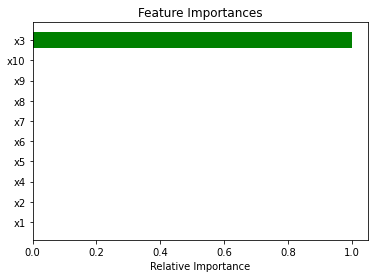

In [43]:
print('Tree depth and number of leaves: {}, {}'.format(g2o_model.get_depth(), g2o_model.get_n_leaves()))

imp = g2o_model.feature_importance()
features = list(data100_1)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### smote

In [44]:
f1_train = cross_val_score(g2_model, x1000_train, y1000_train, scoring='f1', cv=50)
f1_test  = cross_val_score(g2_model, x1000_test, y1000_test, scoring='f1', cv=50)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.9752 %
Test F1 Score:  0.9575 %


Tree depth and number of leaves: 4, 7


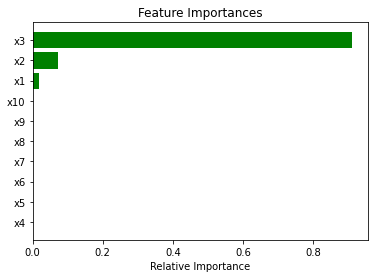

In [45]:
print('Tree depth and number of leaves: {}, {}'.format(g2_model.get_depth(), g2_model.get_n_leaves()))

imp = g2_model.feature_importance()
features = list(data100_1)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 重複訓練100次

#### 原始

In [46]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x1000o_train2, x1000o_test2, y1000o_train2, y1000o_test2 = train_test_split(x1000, y1000, test_size=0.2)  
    g2o_model.fit(x1000o_train2, y1000o_train2)
    y1000_pred_train = g2o_model.predict(x1000o_train2)
    y1000_pred_test = g2o_model.predict(x1000o_test2)
          
    tp1, fn1, fp1, tn1 = confusion_matrix(y1000o_train2, y1000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y1000o_test2, y1000_pred_test).ravel() 
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = g2o_model.feature_importance()
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(788.54, 12.01, 10.92, 68.53)
Test matrix: 
(197.56, 3.22, 2.98, 16.24)

       Score    y=0(多)    y=1(少)
0  precision  0.983963  0.844953
1     recall  0.985140  0.834532
2   f1-score  0.984551  0.839710
Wall time: 693 ms


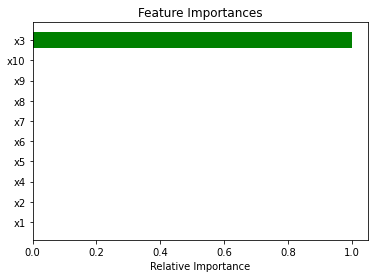

In [47]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### SMOTE

In [48]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x1000_train2, x1000_test2, y1000_train2, y1000_test2 = train_test_split(x1000_sm, y1000_sm, test_size=0.2)  
    g2_model.fit(x1000_train2, y1000_train2)
    y1000_pred_train = g2_model.predict(x1000_train2)
    y1000_pred_test = g2_model.predict(x1000_test2)
    
    tp1, fn1, fp1, tn1 = confusion_matrix(y1000_train2, y1000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y1000_test2, y1000_pred_test).ravel()
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = g2_model.feature_importance()
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(780.15, 20.0, 20.64, 779.21)
Test matrix: 
(193.25, 5.91, 5.96, 194.88)

       Score    y=0(多)    y=1(少)
0  precision  0.970325  0.970325
1     recall  0.970082  0.970566
2   f1-score  0.970204  0.970445
Wall time: 2.03 s


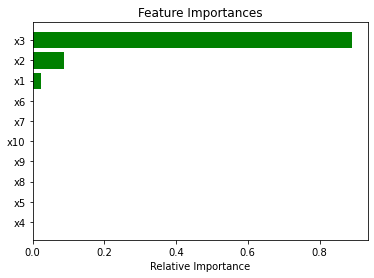

In [49]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 單次參考訓練數值

#### SMOTE

In [50]:
%time g2_model.fit(x1000_train, y1000_train)
y1000_pred_train = g2_model.predict(x1000_train)
y1000_pred_test = g2_model.predict(x1000_test)

print('Train matrix: \n{}'.format(confusion_matrix(y1000_train, y1000_pred_train)))
print('Test matrix: \n{}'.format(confusion_matrix(y1000_test, y1000_pred_test)))

Wall time: 17 ms
Train matrix: 
[[784  21]
 [ 13 782]]
Test matrix: 
[[182  13]
 [  5 200]]


In [51]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y1000_test, y1000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       0.97      0.93      0.95       195
      y=1(少)       0.94      0.98      0.96       205

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



#### 原始

In [53]:
%time g2o_model.fit(x1000o_train, y1000o_train)
y1000_pred_train = g2o_model.predict(x1000o_train)
y1000_pred_test = g2o_model.predict(x1000o_test)

print('Train matrix: \n{}'.format(confusion_matrix(y1000o_train, y1000_pred_train)))
print('Test matrix: \n{}'.format(confusion_matrix(y1000o_test, y1000_pred_test)))

Wall time: 6 ms
Train matrix: 
[[791   9]
 [ 10  70]]
Test matrix: 
[[195   5]
 [  5  15]]


In [54]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y1000o_test, y1000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       0.97      0.97      0.97       200
      y=1(少)       0.75      0.75      0.75        20

    accuracy                           0.95       220
   macro avg       0.86      0.86      0.86       220
weighted avg       0.95      0.95      0.95       220



## DT

### 找參數

#### 原始

In [55]:
param_distribs = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(low=2, high=15)
}

dt_cf = DecisionTreeClassifier(random_state=1)
dt_search = RandomizedSearchCV(dt_cf, param_distributions=param_distribs, 
                                n_iter=100, cv=50, scoring='f1', random_state=1)
dt_search.fit(x1000o_train, y1000o_train)

d2o_model = dt_search.best_estimator_
dt_search.best_params_

{'criterion': 'entropy', 'max_depth': 3}

#### SMOTE

In [56]:
param_distribs = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(low=2, high=15)
}

dt_cf = DecisionTreeClassifier(random_state=1)
dt_search = RandomizedSearchCV(dt_cf, param_distributions=param_distribs, 
                                n_iter=100, cv=50, scoring='f1', random_state=1)
dt_search.fit(x1000_train, y1000_train)

d2_model = dt_search.best_estimator_
dt_search.best_params_

{'criterion': 'entropy', 'max_depth': 6}

### 訓練

#### 原始

In [57]:
f1_train = cross_val_score(d2o_model, x1000o_train, y1000o_train, scoring='f1', cv=10)
f1_test  = cross_val_score(d2o_model, x1000o_test, y1000o_test, scoring='f1', cv=10)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.8631 %
Test F1 Score:  0.5667 %


Tree depth and number of leaves: 3, 8


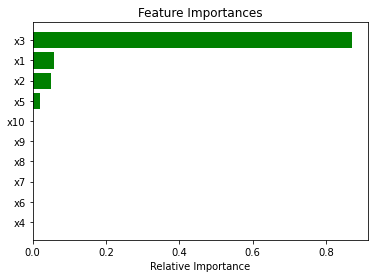

In [58]:
print('Tree depth and number of leaves: {}, {}'.format(d2o_model.get_depth(), d2o_model.get_n_leaves()))

imp = d2o_model.feature_importances_
features = list(data1000_0)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### SMOTE

In [60]:
f1_train = cross_val_score(d2_model, x1000_train, y1000_train, scoring='f1', cv=50)
f1_test  = cross_val_score(d2_model, x1000_test, y1000_test, scoring='f1', cv=50)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.9766 %
Test F1 Score:  0.9463 %


Tree depth and number of leaves: 6, 22


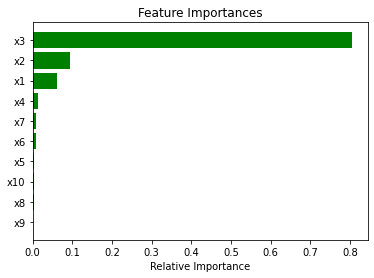

In [61]:
print('Tree depth and number of leaves: {}, {}'.format(d2_model.get_depth(), d2_model.get_n_leaves()))

imp = d2_model.feature_importances_
features = list(data1000_0)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 重複訓練100次，進行平均

#### 原始

In [64]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x1000o_train2, x1000o_test2, y1000o_train2, y1000o_test2 = train_test_split(x1000, y1000, test_size=0.2)
    d2o_model.fit(x1000o_train2, y1000o_train2)
    y1000_pred_train = d2o_model.predict(x1000o_train2)
    y1000_pred_test = d2o_model.predict(x1000o_test2)
    
    tp1, fn1, fp1, tn1 = confusion_matrix(y1000o_train2, y1000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y1000o_test2, y1000_pred_test).ravel()
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = d2o_model.feature_importances_
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(796.22, 13.12, 3.3, 67.36)
Test matrix: 
(198.72, 4.25, 1.76, 15.27)

       Score    y=0(多)    y=1(少)
0  precision  0.979061  0.896653
1     recall  0.991221  0.782275
2   f1-score  0.985103  0.835568
Wall time: 428 ms


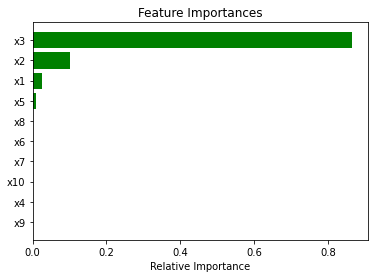

In [65]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### smote

In [66]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x1000_train2, x1000_test2, y1000_train2, y1000_test2 = train_test_split(x1000_sm, y1000_sm, test_size=0.2)
    d2_model.fit(x1000_train2, y1000_train2)
    y1000_pred_train = d2_model.predict(x1000_train2)
    y1000_pred_test = d2_model.predict(x1000_test2)
    
    tp1, fn1, fp1, tn1 = confusion_matrix(y1000_train2, y1000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y1000_test2, y1000_pred_test).ravel()
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = d2_model.feature_importances_
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(793.47, 2.58, 6.48, 797.47)
Test matrix: 
(193.39, 4.34, 6.66, 195.61)

       Score    y=0(多)    y=1(少)
0  precision  0.978051  0.967074
1     recall  0.966708  0.978295
2   f1-score  0.972347  0.972652
Wall time: 898 ms


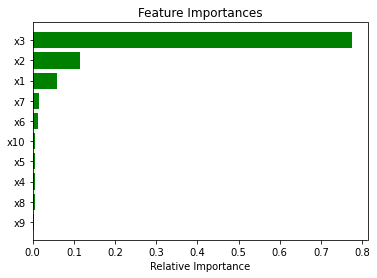

In [67]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 單次訓練參考

#### SMOTE

In [68]:
%time d2_model.fit(x1000_train, y1000_train)
y1000_pred_train = d2_model.predict(x1000_train)
y1000_pred_test = d2_model.predict(x1000_test)

print('Train matrix: \n{}'.format(confusion_matrix(y1000_train, y1000_pred_train)))
print('Test matrix: \n{}'.format(confusion_matrix(y1000_test, y1000_pred_test)))

Wall time: 7 ms
Train matrix: 
[[792  13]
 [  0 795]]
Test matrix: 
[[185  10]
 [  1 204]]


In [69]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y1000_test, y1000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       0.99      0.95      0.97       195
      y=1(少)       0.95      1.00      0.97       205

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



#### 原始

In [70]:
%time d2_model.fit(x1000o_train, y1000o_train)
y1000_pred_train = d2o_model.predict(x1000o_train)
y1000_pred_test = d2o_model.predict(x1000o_test)

print('Train matrix: \n{}'.format(confusion_matrix(y1000o_train, y1000_pred_train)))
print('Test matrix: \n{}'.format(confusion_matrix(y1000o_test, y1000_pred_test)))

Wall time: 3 ms
Train matrix: 
[[799   1]
 [ 15  65]]
Test matrix: 
[[199   1]
 [  7  13]]


In [71]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y1000o_test, y1000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       0.97      0.99      0.98       200
      y=1(少)       0.93      0.65      0.76        20

    accuracy                           0.96       220
   macro avg       0.95      0.82      0.87       220
weighted avg       0.96      0.96      0.96       220



## RF

### 挑參數

#### 原始

In [72]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'criterion': ['gini', 'entropy']
}

rnd_cf = RandomForestClassifier(random_state=1)
rnd_search = RandomizedSearchCV(rnd_cf, param_distributions=param_distribs, 
                                n_iter=100, cv=50, scoring='f1', random_state=1)
rnd_search.fit(x1000o_train, y1000o_train)

rf2o_model = rnd_search.best_estimator_
rnd_search.best_params_

{'criterion': 'gini', 'n_estimators': 72}

#### SMOTE

In [73]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'criterion': ['gini', 'entropy']
}

rnd_cf = RandomForestClassifier(random_state=1)
rnd_search = RandomizedSearchCV(rnd_cf, param_distributions=param_distribs, 
                                n_iter=100, cv=50, scoring='f1', random_state=1)
rnd_search.fit(x1000_train, y1000_train)

rf2_model = rnd_search.best_estimator_
rnd_search.best_params_

{'criterion': 'gini', 'n_estimators': 44}

### 訓練

#### 原始

In [74]:
f1_train = cross_val_score(rf2o_model, x1000o_train, y1000o_train, scoring='f1', cv=10)
f1_test  = cross_val_score(rf2o_model, x1000o_test, y1000o_test, scoring='f1', cv=10)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.8887 %
Test F1 Score:  0.7400 %


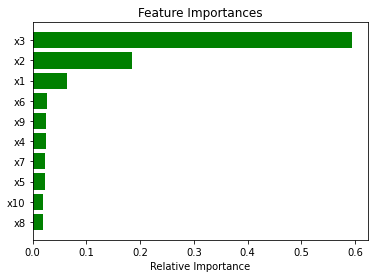

In [75]:
imp = rf2o_model.feature_importances_
features = list(data100_0)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### SMOTE

In [76]:
f1_train = cross_val_score(rf2_model, x1000_train, y1000_train, scoring='f1', cv=50)
f1_test  = cross_val_score(rf2_model, x1000_test, y1000_test, scoring='f1', cv=50)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.9882 %
Test F1 Score:  0.9635 %


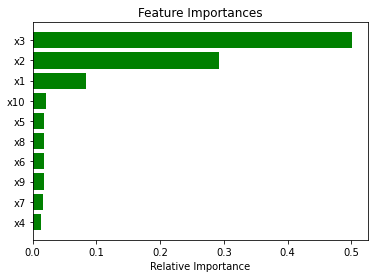

In [77]:
imp = rf2_model.feature_importances_
features = list(data100_0)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 重複訓練100次，進行平均

#### 原始

In [78]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x1000o_train2, x1000o_test2, y1000o_train2, y1000o_test2 = train_test_split(x1000, y1000, test_size=0.2)
    rf2o_model.fit(x1000o_train2, y1000o_train2)
    y1000_pred_train = rf2o_model.predict(x1000o_train2)
    y1000_pred_test = rf2o_model.predict(x1000o_test2)
    
    tp1, fn1, fp1, tn1 = confusion_matrix(y1000o_train2, y1000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y1000o_test2, y1000_pred_test).ravel()
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = rf2o_model.feature_importances_
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(800.07, 0.05, 0.0, 79.88)
Test matrix: 
(198.69, 3.7, 1.24, 16.37)

       Score    y=0(多)    y=1(少)
0  precision  0.981718  0.929585
1     recall  0.993798  0.815645
2   f1-score  0.987721  0.868896
Wall time: 10.7 s


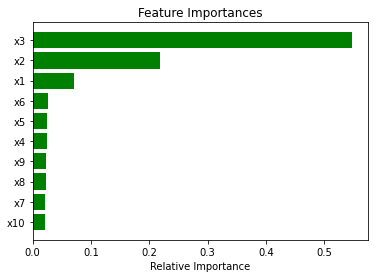

In [79]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### SMOTE

In [80]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x1000_train2, x1000_test2, y1000_train2, y1000_test2 = train_test_split(x1000_sm, y1000_sm, test_size=0.2)  
    rf2_model.fit(x1000_train2, y1000_train2)
    y1000_pred_train = rf2_model.predict(x1000_train2)
    y1000_pred_test = rf2_model.predict(x1000_test2)
    
    tp1, fn1, fp1, tn1 = confusion_matrix(y1000_train2, y1000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y1000_test2, y1000_pred_test).ravel()
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = rf2_model.feature_importances_
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(799.87, 0.02, 0.01, 800.1)
Test matrix: 
(196.41, 2.15, 3.71, 197.73)

       Score    y=0(多)    y=1(少)
0  precision  0.989172  0.981583
1     recall  0.981461  0.989244
2   f1-score  0.985301  0.985398
Wall time: 9.98 s


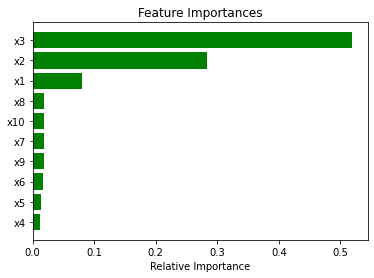

In [81]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 單次參考訓練數值

#### 原始

In [82]:
%time rf2o_model.fit(x1000o_train, y1000o_train)
y1000_pred_train = rf2o_model.predict(x1000o_train)
y1000_pred_test = rf2o_model.predict(x1000o_test)

print('Train matrix: \n{}'.format(confusion_matrix(y1000o_train, y1000_pred_train)))
print('Train matrix: \n{}'.format(confusion_matrix(y1000o_test, y1000_pred_test)))

Wall time: 94 ms
Train matrix: 
[[800   0]
 [  0  80]]
Train matrix: 
[[197   3]
 [  5  15]]


In [84]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y1000o_test, y1000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       0.98      0.98      0.98       200
      y=1(少)       0.83      0.75      0.79        20

    accuracy                           0.96       220
   macro avg       0.90      0.87      0.88       220
weighted avg       0.96      0.96      0.96       220



#### SMOTE

In [85]:
%time rf2_model.fit(x1000_train, y1000_train)
y1000_pred_train = rf2_model.predict(x1000_train)
y1000_pred_test = rf2_model.predict(x1000_test)

print('Train matrix: \n{}'.format(confusion_matrix(y1000_train, y1000_pred_train)))
print('Train matrix: \n{}'.format(confusion_matrix(y1000_test, y1000_pred_test)))

Wall time: 89 ms
Train matrix: 
[[804   1]
 [  0 795]]
Train matrix: 
[[190   5]
 [  1 204]]


In [86]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y1000_test, y1000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       0.99      0.97      0.98       195
      y=1(少)       0.98      1.00      0.99       205

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



## 各指標長條圖

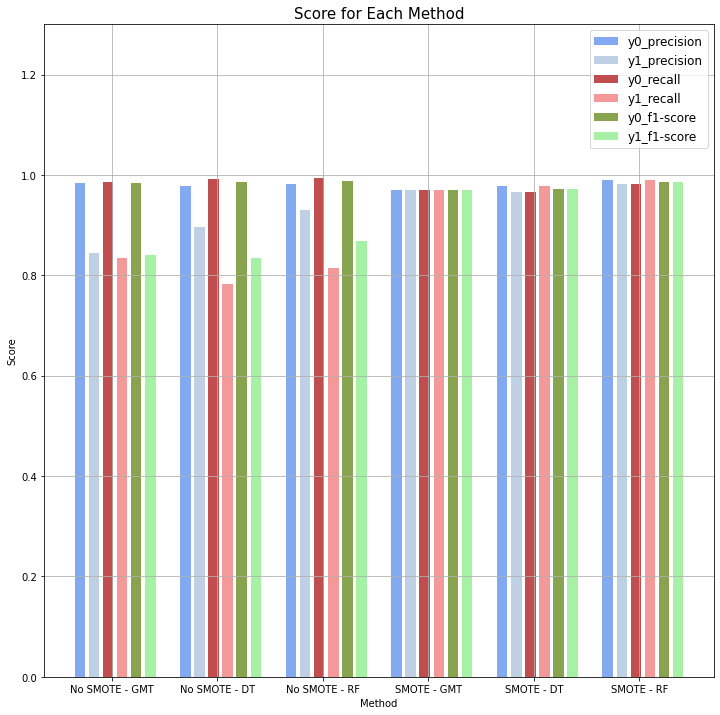

In [140]:
method_count = 6 #列出三個方法的SMOTE前與後
bar_width = 0.3 #長條寬度
index = 3*np.arange(method_count)

#擷取三個評估值的數字
y_0_precision = [0.983963, 0.979061, 0.981718, 0.970325, 0.978051, 0.989172]
y_1_precision = [0.844953, 0.896653, 0.929585, 0.970325, 0.967074, 0.981583]
y_0_recall    = [0.985140, 0.991221, 0.993798, 0.970082, 0.966708, 0.981461]
y_1_recall    = [0.834532, 0.782275, 0.815645, 0.970566, 0.978295, 0.989244]
y_0_f1score   = [0.984551, 0.985103, 0.987721, 0.970204, 0.972347, 0.985301]
y_1_f1score   = [0.839710, 0.835568, 0.868896, 0.970445, 0.972652, 0.985398]

plt.figure(figsize=(12,12))

y_0_precision = plt.bar(index,         #長條圖位置
                       y_0_precision,  #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'cornflowerblue',    
                       label = "y0_precision")
y_1_precision = plt.bar(index+0.4,     #長條圖位置
                       y_1_precision,  #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'lightsteelblue',   
                       label = "y1_precision")
y_0_recall    = plt.bar(index+0.8,     #長條圖位置
                       y_0_recall,     #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'firebrick',   
                       label = "y0_recall")
y_1_recall    = plt.bar(index+1.2,     #長條圖位置
                       y_1_recall,     #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'lightcoral',   
                       label = "y1_recall")
y_0_f1score   = plt.bar(index+1.6,     #長條圖位置
                       y_0_f1score,    #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'olivedrab',   
                       label = "y0_f1-score")
y_1_f1score   = plt.bar(index+2,     #長條圖位置
                       y_1_f1score,    #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'lightgreen',   
                       label = "y1_f1-score")

# 長條圖左上的標籤
def createLabels(data):                   # 自定義函數，為引用plusone團隊
    for item in data:
        height = item.get_height()
        #plt.text(                        # 數值顯示
        #    item.get_x()+item.get_width()/2., 
        #    height*1.05, 
        #    '%d' % int(height),
        #    ha = "center",
        #    va = "bottom",
        #)
createLabels(y_0_precision)
createLabels(y_1_precision)
createLabels(y_0_recall)
createLabels(y_1_recall)
createLabels(y_0_f1score)
createLabels(y_1_f1score)

plt.ylabel("Score")          # 設定y軸標題 
plt.xlabel("Method")            # 設定x軸標題
plt.title("Score for Each Method", {'fontsize' : 15})  # 設定標題、文字大小
plt.xticks(index+3*bar_width ,("No SMOTE - GMT", "No SMOTE - DT", "No SMOTE - RF", "SMOTE - GMT", "SMOTE - DT", "SMOTE - RF"))  #.xticks為x軸文字(為了置中所以+0.3/2)
plt.ylim(0, 1.3)                 # 設定y軸範圍
plt.legend(prop = {'size':12})    # 設定圖例及其大小
plt.grid(True)                   # 顯示格線

# 100:10000

## DATA

In [87]:
np.random.seed(1)

m = 100

data10000_1 = {
    "x1": np.random.normal(0, 1, m),
    "x2": np.random.normal(0, 1, m),
    "x3": np.random.normal(0, 1, m),
    "x4": np.random.normal(0, 1, m),
    "x5": np.random.normal(0, 1, m),
    "x6": np.random.normal(0, 1, m),
    "x7": np.random.normal(0, 1, m),
    "x8": np.random.normal(0, 1, m),
    "x9": np.random.normal(0, 1, m),
    "x10": np.random.normal(0, 1, m),
    "y": [1]*m
}

data10000_1 = pd.DataFrame(data10000_1)

data10000_0 = {
    "x1": np.random.normal(1, 1, m*100),
    "x2": np.random.normal(2, 1, m*100),
    "x3": np.random.normal(3, 1, m*100),
    "x4": np.random.normal(0, 1, m*100),
    "x5": np.random.normal(0, 1, m*100),
    "x6": np.random.normal(0, 1, m*100),
    "x7": np.random.normal(0, 1, m*100),
    "x8": np.random.normal(0, 1, m*100),
    "x9": np.random.normal(0, 1, m*100),
    "x10": np.random.normal(0, 1, m*100),
    "y": [0]*m*100
}

data10000_0 = pd.DataFrame(data10000_0)

In [88]:
x10000 = np.append(np.array(data10000_0)[:, 0:10],np.array(data10000_1)[:, 0:10], axis = 0)
y10000 = np.append(np.array(data10000_0)[:, 10],np.array(data10000_1)[:, 10])

sm = SMOTE(random_state=1)
x10000_sm, y10000_sm = sm.fit_resample(x10000, y10000)  

x10000_train, x10000_test, y10000_train, y10000_test = train_test_split(x10000_sm, y10000_sm, test_size=0.2,  random_state=1) 
x10000o_train, x10000o_test, y10000o_train, y10000o_test = train_test_split(x10000, y10000, test_size=0.2,  random_state=1) 

In [89]:
data10000_0

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.846764,3.351321,3.536642,1.496272,0.651069,-0.770326,0.646652,-0.027238,0.423418,-0.793670,0
1,-1.432509,1.651650,3.153198,-1.252430,-0.258089,0.835948,-1.806468,0.773101,1.184459,-0.039941,0
2,1.507984,1.937799,0.421730,-1.625512,-0.858608,0.006584,0.524363,-0.195959,-1.832066,0.186855,0
3,0.675968,2.184909,2.787029,0.878851,0.085445,0.758635,-1.167497,0.344272,-0.988058,1.189095,0
4,-0.511077,1.614047,2.792005,-1.736564,0.393518,1.742306,-1.026182,-0.652866,-1.309615,0.207969,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.444426,2.491078,4.000387,0.902224,2.056262,-0.296807,2.711644,-0.103027,-0.392232,-1.187391,0
9996,2.101262,0.227586,2.454653,-0.775980,0.802633,1.024270,0.992301,-0.619629,0.321456,1.125308,0
9997,-0.354035,0.902162,4.483542,-1.606281,-0.234529,0.198966,0.179169,-1.210005,-0.794164,0.465814,0
9998,1.698086,3.090739,4.233814,-1.564649,1.536377,-1.471925,1.228073,1.075987,1.127724,-1.130064,0


In [90]:
data10000_1

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,1.624345,-0.447129,-0.400878,2.065783,-1.306534,-1.719394,-1.072964,-0.790800,0.814343,-0.446699,1
1,-0.611756,1.224508,0.824006,-1.471157,0.076380,0.057121,0.495159,1.223722,0.780470,0.204377,1
2,-0.528172,0.403492,-0.562305,-0.830172,0.367232,-0.799547,-0.952062,-0.059368,-1.464054,0.612233,1
3,-1.072969,0.593579,1.954878,-0.880578,1.232899,-0.291595,-0.518146,1.448989,-0.154491,0.744885,1
4,0.865408,-1.094912,-1.331952,-0.279098,-0.422857,-0.258983,-1.461404,-0.477581,-0.092432,-0.036281,1
...,...,...,...,...,...,...,...,...,...,...,...
95,0.077340,-1.627438,-0.297362,0.794528,-0.828628,1.453918,-0.131676,-1.229574,0.578464,-0.116444,1
96,-0.343854,0.602319,0.417302,-1.873161,0.528880,0.661681,1.018552,1.108617,-0.961264,-2.277298,1
97,0.043597,0.420282,0.784771,0.920615,-2.237087,0.986352,1.230558,-0.702920,-1.458324,-0.069625,1
98,-0.620001,0.810952,-0.955425,-0.035368,-1.107713,-0.466155,-1.181103,0.725551,0.494342,0.353870,1


## GMT

### 參數挑選

#### 原始

In [91]:
# model
gmt = PerpendicularClassificationTree(
    #partition_prior=0.9,
    prior=prior,
    #delta=0, 
    prune=False) #分類

param_distribs = {
    'partition_prior': np.linspace(0.01,0.99,40),
    'delta': np.linspace(0,1,40)
}

gmt_search = RandomizedSearchCV(gmt, 
    param_distributions=param_distribs, n_iter=100, cv=50, 
    scoring='f1', random_state=1)

gmt_search.fit(x10000o_train, y10000o_train)
g3o_model = gmt_search.best_estimator_
gmt_search.best_params_

{'partition_prior': 0.8894871794871795, 'delta': 0.02564102564102564}

#### SMOTE

In [92]:
# model
gmt = PerpendicularClassificationTree(
    #partition_prior=0.9,
    prior=prior,
    #delta=0, 
    prune=False) #分類

param_distribs = {
    'partition_prior': np.linspace(0.01,0.99,40),
    'delta': np.linspace(0,1,40)
}

gmt_search = RandomizedSearchCV(gmt, 
    param_distributions=param_distribs, n_iter=100, cv=50, 
    scoring='f1', random_state=1)

gmt_search.fit(x10000_train, y10000_train)
g3_model = gmt_search.best_estimator_
gmt_search.best_params_

{'partition_prior': 0.21102564102564103, 'delta': 0.0}

### 訓練

#### 原始

In [93]:
f1_train = cross_val_score(g3o_model, x10000o_train, y10000o_train, scoring='f1', cv=10)
f1_test  = cross_val_score(g3o_model, x10000o_test, y10000o_test, scoring='f1', cv=10)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.6041 %
Test F1 Score:  0.6833 %


Tree depth and number of leaves: 2, 4


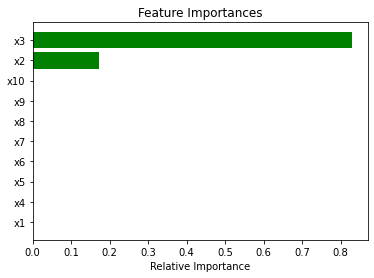

In [94]:
print('Tree depth and number of leaves: {}, {}'.format(g3o_model.get_depth(), g3o_model.get_n_leaves()))

imp = g3o_model.feature_importance()
features = list(data100_1)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### SMOTE

In [95]:
f1_train = cross_val_score(g3_model, x10000_train, y10000_train, scoring='f1', cv=50)
f1_test  = cross_val_score(g3_model, x10000_test, y10000_test, scoring='f1', cv=50)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.9849 %
Test F1 Score:  0.9743 %


Tree depth and number of leaves: 8, 24


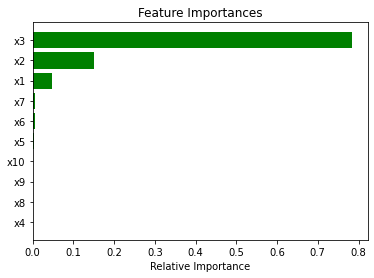

In [96]:
print('Tree depth and number of leaves: {}, {}'.format(g3_model.get_depth(), g3_model.get_n_leaves()))

imp = g3_model.feature_importance()
features = list(data100_1)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 重複訓練100次

#### 原始

In [97]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x10000o_train2, x10000o_test2, y10000o_train2, y10000o_test2 = train_test_split(x10000, y10000, test_size=0.2)  
    g3o_model.fit(x10000o_train2, y10000o_train2)
    y10000_pred_train = g3o_model.predict(x10000o_train2)
    y10000_pred_test = g3o_model.predict(x10000o_test2)
          
    tp1, fn1, fp1, tn1 = confusion_matrix(y10000o_train2, y10000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y10000o_test2, y10000_pred_test).ravel() 
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = g3o_model.feature_importance()
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(7986.36, 23.6, 12.75, 57.29)
Test matrix: 
(1996.7, 7.13, 4.19, 11.98)

       Score    y=0(多)    y=1(少)
0  precision  0.996442  0.740878
1     recall  0.997906  0.626897
2   f1-score  0.997173  0.679138
Wall time: 5.96 s


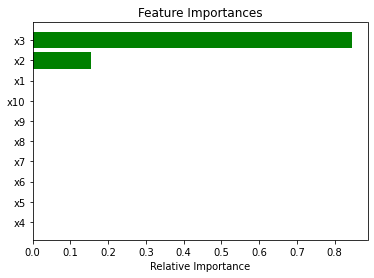

In [98]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### SMOTE

In [99]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x10000_train2, x10000_test2, y10000_train2, y10000_test2 = train_test_split(x10000_sm, y10000_sm, test_size=0.2)  
    g3_model.fit(x10000_train2, y10000_train2)
    y10000_pred_train = g3_model.predict(x10000_train2)
    y10000_pred_test = g3_model.predict(x10000_test2)
          
    tp1, fn1, fp1, tn1 = confusion_matrix(y10000_train2, y10000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y10000_test2, y10000_pred_test).ravel() 
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = g3_model.feature_importance()
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(7799.61, 25.36, 202.23, 7972.8)
Test matrix: 
(1938.63, 11.11, 59.53, 1990.73)

       Score    y=0(多)    y=1(少)
0  precision  0.994302  0.970965
1     recall  0.970208  0.994450
2   f1-score  0.982107  0.982567
Wall time: 17.9 s


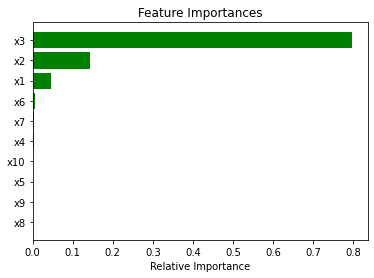

In [100]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 單次參考訓練數值

#### 原始

In [101]:
%time g3o_model.fit(x10000o_train, y10000o_train)
y10000_pred_train = g3o_model.predict(x10000o_train)
y10000_pred_test = g3o_model.predict(x10000o_test)

print('Train matrix: \n{}'.format(confusion_matrix(y10000o_train, y10000_pred_train)))
print('Train matrix: \n{}'.format(confusion_matrix(y10000o_test, y10000_pred_test)))

Wall time: 55 ms
Train matrix: 
[[7986   12]
 [  24   58]]
Train matrix: 
[[1999    3]
 [   8   10]]


In [103]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y10000o_test, y10000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       1.00      1.00      1.00      2002
      y=1(少)       0.77      0.56      0.65        18

    accuracy                           0.99      2020
   macro avg       0.88      0.78      0.82      2020
weighted avg       0.99      0.99      0.99      2020



#### SMOTE

In [104]:
%time g3_model.fit(x10000_train, y10000_train)
y10000_pred_train = g3_model.predict(x10000_train)
y10000_pred_test = g3_model.predict(x10000_test)

print('Train matrix: \n{}'.format(confusion_matrix(y10000_train, y10000_pred_train)))
print('Train matrix: \n{}'.format(confusion_matrix(y10000_test, y10000_pred_test)))

Wall time: 180 ms
Train matrix: 
[[7773  182]
 [  20 8025]]
Train matrix: 
[[1990   55]
 [  12 1943]]


In [105]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y10000_test, y10000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       0.99      0.97      0.98      2045
      y=1(少)       0.97      0.99      0.98      1955

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



## DT 

### 找參數

#### 原始

In [106]:
param_distribs = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(low=2, high=15)
}

dt_cf = DecisionTreeClassifier(random_state=1)
dt_search = RandomizedSearchCV(dt_cf, param_distributions=param_distribs, 
                                n_iter=100, cv=50, scoring='f1', random_state=1)
dt_search.fit(x10000o_train, y10000o_train)

d3o_model = dt_search.best_estimator_
dt_search.best_params_

{'criterion': 'gini', 'max_depth': 3}

#### SMOTE

In [107]:
param_distribs = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(low=2, high=15)
}

dt_cf = DecisionTreeClassifier(random_state=1)
dt_search = RandomizedSearchCV(dt_cf, param_distributions=param_distribs, 
                           
                               n_iter=100, cv=50, scoring='f1', random_state=1)
dt_search.fit(x10000_train, y10000_train)

d3_model = dt_search.best_estimator_
dt_search.best_params_

{'criterion': 'entropy', 'max_depth': 14}

### 訓練

#### 原始

In [110]:
f1_train = cross_val_score(d3o_model, x10000o_train, y10000o_train, scoring='f1', cv=10)
f1_test  = cross_val_score(d3o_model, x10000o_test, y10000o_test, scoring='f1', cv=10)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.6602 %
Test F1 Score:  0.6500 %


Tree depth and number of leaves: 3, 8


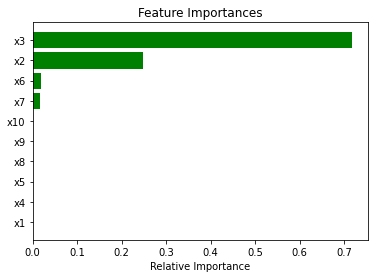

In [111]:
print('Tree depth and number of leaves: {}, {}'.format(d3o_model.get_depth(), d3o_model.get_n_leaves()))

imp = d3o_model.feature_importances_
features = list(data1000_0)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### SMOTE

In [112]:
f1_train = cross_val_score(d3_model, x10000_train, y10000_train, scoring='f1', cv=50)
f1_test  = cross_val_score(d3_model, x10000_test, y10000_test, scoring='f1', cv=50)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.9928 %
Test F1 Score:  0.9797 %


Tree depth and number of leaves: 14, 107


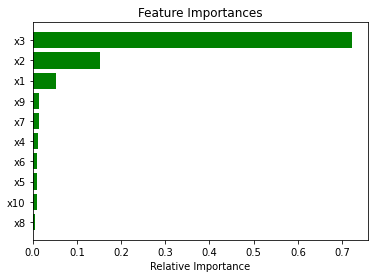

In [113]:
print('Tree depth and number of leaves: {}, {}'.format(d3_model.get_depth(), d3_model.get_n_leaves()))

imp = d3_model.feature_importances_
features = list(data1000_0)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 重複訓練100次，進行平均

#### 原始

In [114]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x10000o_train2, x10000o_test2, y10000o_train2, y10000o_test2 = train_test_split(x10000, y10000, test_size=0.2)  
    d3o_model.fit(x10000o_train2, y10000o_train2)
    y10000_pred_train = d3o_model.predict(x10000o_train2)
    y10000_pred_test = d3o_model.predict(x10000o_test2)
          
    tp1, fn1, fp1, tn1 = confusion_matrix(y10000o_train2, y10000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y10000o_test2, y10000_pred_test).ravel() 
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = d3o_model.feature_importances_
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(7989.78, 18.16, 10.2, 61.86)
Test matrix: 
(1995.88, 6.93, 4.14, 13.05)

       Score    y=0(多)    y=1(少)
0  precision  0.996540  0.759162
1     recall  0.997930  0.653153
2   f1-score  0.997234  0.702179
Wall time: 2.89 s


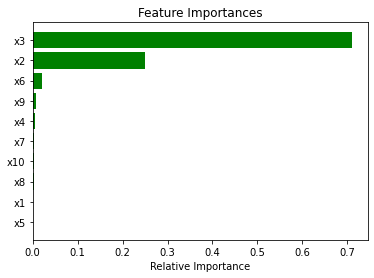

In [115]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### SMOTE

In [116]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x10000_train2, x10000_test2, y10000_train2, y10000_test2 = train_test_split(x10000_sm, y10000_sm, test_size=0.2)  
    d3_model.fit(x10000_train2, y10000_train2)
    y10000_pred_train = d3_model.predict(x10000_train2)
    y10000_pred_test = d3_model.predict(x10000_test2)
          
    tp1, fn1, fp1, tn1 = confusion_matrix(y10000_train2, y10000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y10000_test2, y10000_pred_test).ravel() 
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = d3_model.feature_importances_
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(7987.76, 0.53, 9.66, 8002.05)
Test matrix: 
(1978.08, 8.52, 24.5, 1988.9)

       Score    y=0(多)    y=1(少)
0  precision  0.995711  0.987832
1     recall  0.987766  0.995734
2   f1-score  0.991723  0.991767
Wall time: 11.9 s


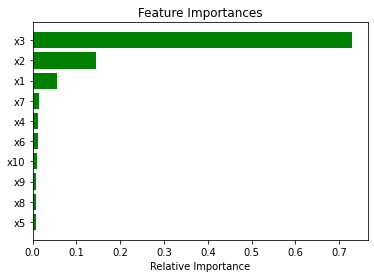

In [117]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 單次參考訓練數值

#### 原始

In [118]:
%time d3o_model.fit(x10000o_train, y10000o_train)
y10000_pred_train = d3o_model.predict(x10000o_train)
y10000_pred_test = d3o_model.predict(x10000o_test)

print('Train matrix: \n{}'.format(confusion_matrix(y10000o_train, y10000_pred_train)))
print('Train matrix: \n{}'.format(confusion_matrix(y10000o_test, y10000_pred_test)))

Wall time: 22 ms
Train matrix: 
[[7987   11]
 [  20   62]]
Train matrix: 
[[2000    2]
 [   5   13]]


In [120]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y10000o_test, y10000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       1.00      1.00      1.00      2002
      y=1(少)       0.87      0.72      0.79        18

    accuracy                           1.00      2020
   macro avg       0.93      0.86      0.89      2020
weighted avg       1.00      1.00      1.00      2020



#### SMOTE

In [121]:
%time d3_model.fit(x10000_train, y10000_train)
y10000_pred_train = d3_model.predict(x10000_train)
y10000_pred_test = d3_model.predict(x10000_test)

print('Train matrix: \n{}'.format(confusion_matrix(y10000_train, y10000_pred_train)))
print('Train matrix: \n{}'.format(confusion_matrix(y10000_test, y10000_pred_test)))

Wall time: 105 ms
Train matrix: 
[[7948    7]
 [   1 8044]]
Train matrix: 
[[2015   30]
 [   9 1946]]


In [122]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y10000_test, y10000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       1.00      0.99      0.99      2045
      y=1(少)       0.98      1.00      0.99      1955

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



## RF

### 挑參數

#### 原始

In [108]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'criterion': ['gini', 'entropy']
}

rnd_cf = RandomForestClassifier(random_state=1)
rnd_search = RandomizedSearchCV(rnd_cf, param_distributions=param_distribs, 
                                n_iter=100, cv=50, scoring='f1', random_state=1)
rnd_search.fit(x10000o_train, y10000o_train)

rf3o_model = rnd_search.best_estimator_
rnd_search.best_params_

{'criterion': 'gini', 'n_estimators': 77}

#### SMOTE

In [109]:
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'criterion': ['gini', 'entropy']
}

rnd_cf = RandomForestClassifier(random_state=1)
rnd_search = RandomizedSearchCV(rnd_cf, param_distributions=param_distribs, 
                                n_iter=100, cv=50, scoring='f1', random_state=1)
rnd_search.fit(x10000_train, y10000_train)

rf3_model = rnd_search.best_estimator_
rnd_search.best_params_

{'criterion': 'gini', 'n_estimators': 97}

### 訓練

#### 原始

In [123]:
f1_train = cross_val_score(rf3o_model, x10000o_train, y10000o_train, scoring='f1', cv=10)
f1_test  = cross_val_score(rf3o_model, x10000o_test, y10000o_test, scoring='f1', cv=10)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.6666 %
Test F1 Score:  0.5667 %


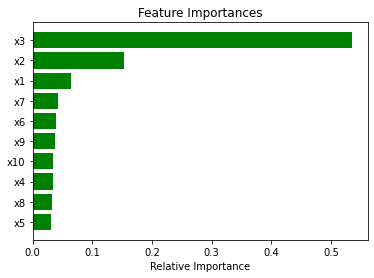

In [124]:
imp = rf3o_model.feature_importances_
features = list(data1000_0)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### SMOTE

In [125]:
f1_train = cross_val_score(rf3_model, x10000_train, y10000_train, scoring='f1', cv=50)
f1_test  = cross_val_score(rf3_model, x10000_test, y10000_test, scoring='f1', cv=50)
info_train = 'Train F1 Score: {:.4f} %'.format(f1_train.mean())
info_test  = 'Test F1 Score:  {:.4f} %'.format(f1_test.mean())

print(info_train)
print(info_test)

Train F1 Score: 0.9974 %
Test F1 Score:  0.9901 %


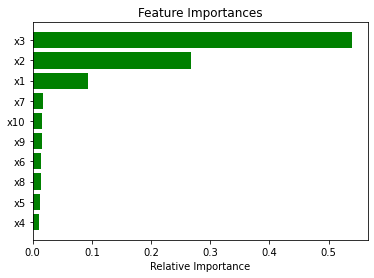

In [126]:
imp = rf3_model.feature_importances_
features = list(data100_0)[0:-1]
sorted(zip(imp, features), reverse=True)
ind = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(ind)), imp[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

### 重複訓練100次，進行平均

#### 原始

In [127]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x10000o_train2, x10000o_test2, y10000o_train2, y10000o_test2 = train_test_split(x10000, y10000, test_size=0.2)  
    rf3o_model.fit(x10000o_train2, y10000o_train2)
    y10000_pred_train = rf3o_model.predict(x10000o_train2)
    y10000_pred_test = rf3o_model.predict(x10000o_test2)
          
    tp1, fn1, fp1, tn1 = confusion_matrix(y10000o_train2, y10000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y10000o_test2, y10000_pred_test).ravel() 
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = rf3o_model.feature_importances_
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(7999.43, 0.13, 0.0, 80.44)
Test matrix: 
(1998.34, 7.81, 2.23, 11.62)

       Score    y=0(多)    y=1(少)
0  precision  0.996107  0.838989
1     recall  0.998885  0.598044
2   f1-score  0.997494  0.698317
Wall time: 1min 18s


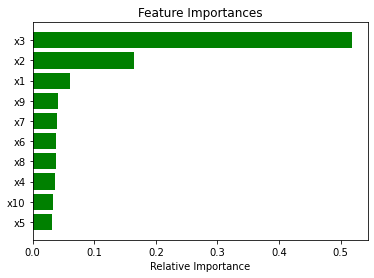

In [128]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()


#### SMOTE

In [129]:
%%time
tn_train, fp_train, fn_train, tp_train = 0, 0, 0, 0
tn_test, fp_test, fn_test, tp_test = 0, 0, 0, 0
imp = 0

for i in range(0,100):
    x10000_train2, x10000_test2, y10000_train2, y10000_test2 = train_test_split(x10000_sm, y10000_sm, test_size=0.2)  
    rf3_model.fit(x10000_train2, y10000_train2)
    y10000_pred_train = rf3_model.predict(x10000_train2)
    y10000_pred_test = rf3_model.predict(x10000_test2)
          
    tp1, fn1, fp1, tn1 = confusion_matrix(y10000_train2, y10000_pred_train).ravel()
    tp2, fn2, fp2, tn2 = confusion_matrix(y10000_test2, y10000_pred_test).ravel() 
    
    tn_train = tn1 + tn_train
    fp_train = fp1 + fp_train
    fn_train = fn1 + fn_train
    tp_train = tp1 + tp_train
    
    tn_test = tn2 + tn_test
    fp_test = fp2 + fp_test
    fn_test = fn2 + fn_test
    tp_test = tp2 + tp_test
    
    imp2 = rf3_model.feature_importances_
    imp = imp + imp2

print('Train matrix: \n{}'.format((tp_train/100, fp_train/100, fn_train/100, tn_train/100)))
print('Test matrix: \n{}\n'.format((tp_test/100, fp_test/100, fn_test/100, tn_test/100)))

recall_0 = tp_test/(tp_test+fn_test)
precision_0 = tp_test/(tp_test+fp_test)
recall_1 = tn_test/(tn_test+fp_test)
precision_1 = tn_test/(tn_test+fn_test)

score = {
    "Score" : ["precision", "recall",  "f1-score"],
    "y=0(多)" : [precision_0, recall_0, 2*((precision_0*recall_0)/(precision_0 + recall_0))],
    "y=1(少)" : [precision_1, recall_1, 2*((precision_1*recall_1)/(precision_1 + recall_1))]
}
sc = pd.DataFrame(score)
print(sc)

Train matrix: 
(7998.83, 0.0, 0.0, 8001.17)
Test matrix: 
(1988.53, 0.27, 12.64, 1998.56)

       Score    y=0(多)    y=1(少)
0  precision  0.999864  0.993715
1     recall  0.993684  0.999865
2   f1-score  0.996764  0.996781
Wall time: 3min 58s


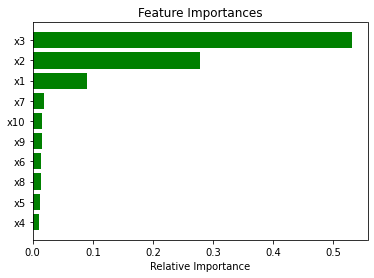

In [130]:
features = list(data100_1)[0:-1]
sorted(zip(imp/100, features), reverse=True)
ind = np.argsort(imp/100)

plt.title('Feature Importances')
plt.barh(range(len(ind)), (imp/100)[ind], color='g', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

#### 單次參考訓練數值

#### 原始

In [131]:
%time rf3o_model.fit(x10000o_train, y10000o_train)
y10000_pred_train = rf3o_model.predict(x10000o_train)
y10000_pred_test = rf3o_model.predict(x10000o_test)

print('Train matrix: \n{}'.format(confusion_matrix(y10000o_train, y10000_pred_train)))
print('Train matrix: \n{}'.format(confusion_matrix(y10000o_test, y10000_pred_test)))

Wall time: 766 ms
Train matrix: 
[[7998    0]
 [   1   81]]
Train matrix: 
[[2002    0]
 [   7   11]]


In [133]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y10000o_test, y10000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       1.00      1.00      1.00      2002
      y=1(少)       1.00      0.61      0.76        18

    accuracy                           1.00      2020
   macro avg       1.00      0.81      0.88      2020
weighted avg       1.00      1.00      1.00      2020



#### SMOTE

In [134]:
%time rf3_model.fit(x10000_train, y10000_train)
y10000_pred_train = rf3_model.predict(x10000_train)
y10000_pred_test = rf3_model.predict(x10000_test)

print('Train matrix: \n{}'.format(confusion_matrix(y10000_train, y10000_pred_train)))
print('Train matrix: \n{}'.format(confusion_matrix(y10000_test, y10000_pred_test)))

Wall time: 2.26 s
Train matrix: 
[[7955    0]
 [   0 8045]]
Train matrix: 
[[2030   15]
 [   0 1955]]


In [135]:
class_name = ['y=0(多)','y=1(少)']
print(classification_report(y1000_test, y1000_pred_test, target_names = class_name))

              precision    recall  f1-score   support

      y=0(多)       0.99      0.97      0.98       195
      y=1(少)       0.98      1.00      0.99       205

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



## 各指標長條圖

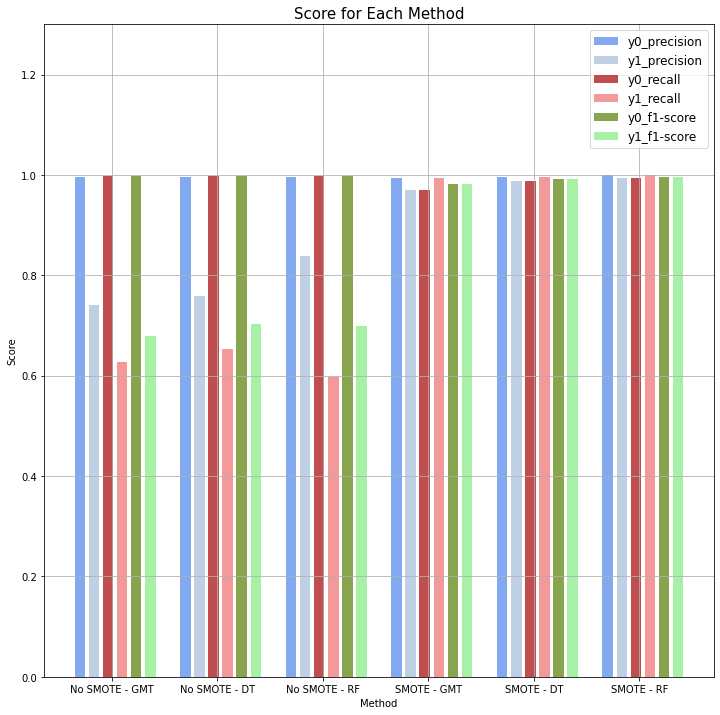

In [141]:
method_count = 6 #列出三個方法的SMOTE前與後
bar_width = 0.3 #長條寬度
index = 3*np.arange(method_count)

#擷取三個評估值的數字
y_0_precision = [0.996442, 0.996540, 0.996107, 0.994302, 0.995711, 0.999864]
y_1_precision = [0.740878, 0.759162, 0.838989, 0.970965, 0.987832, 0.993715]
y_0_recall    = [0.997906, 0.997930, 0.998885, 0.970208, 0.987766, 0.993684]
y_1_recall    = [0.626897, 0.653153, 0.598044, 0.994450, 0.995734, 0.999865]
y_0_f1score   = [0.997173, 0.997234, 0.997494, 0.982107, 0.991723, 0.996764]
y_1_f1score   = [0.679138, 0.702179, 0.698317, 0.982567, 0.991767, 0.996781]

plt.figure(figsize=(12,12))

y_0_precision = plt.bar(index,         #長條圖位置
                       y_0_precision,  #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'cornflowerblue',    
                       label = "y0_precision")
y_1_precision = plt.bar(index+0.4,     #長條圖位置
                       y_1_precision,  #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'lightsteelblue',   
                       label = "y1_precision")
y_0_recall    = plt.bar(index+0.8,     #長條圖位置
                       y_0_recall,     #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'firebrick',   
                       label = "y0_recall")
y_1_recall    = plt.bar(index+1.2,     #長條圖位置
                       y_1_recall,     #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'lightcoral',   
                       label = "y1_recall")
y_0_f1score   = plt.bar(index+1.6,     #長條圖位置
                       y_0_f1score,    #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'olivedrab',   
                       label = "y0_f1-score")
y_1_f1score   = plt.bar(index+2,     #長條圖位置
                       y_1_f1score,    #資料
                       bar_width,      #長條圖寬度
                       alpha = 0.8,    #透明度
                       color = 'lightgreen',   
                       label = "y1_f1-score")

# 長條圖左上的標籤
def createLabels(data):                   # 自定義函數，為引用plusone團隊
    for item in data:
        height = item.get_height()
        #plt.text(                        # 數值顯示
        #    item.get_x()+item.get_width()/2., 
        #    height*1.05, 
        #    '%d' % int(height),
        #    ha = "center",
        #    va = "bottom",
        #)
createLabels(y_0_precision)
createLabels(y_1_precision)
createLabels(y_0_recall)
createLabels(y_1_recall)
createLabels(y_0_f1score)
createLabels(y_1_f1score)

plt.ylabel("Score")          # 設定y軸標題 
plt.xlabel("Method")            # 設定x軸標題
plt.title("Score for Each Method", {'fontsize' : 15})  # 設定標題、文字大小
plt.xticks(index+3*bar_width ,("No SMOTE - GMT", "No SMOTE - DT", "No SMOTE - RF", "SMOTE - GMT", "SMOTE - DT", "SMOTE - RF"))  #.xticks為x軸文字(為了置中所以+0.3/2)
plt.ylim(0, 1.3)                 # 設定y軸範圍
plt.legend(prop = {'size':12})    # 設定圖例及其大小
plt.grid(True)                   # 顯示格線